In [177]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.float_format='{:,.2f}'.format # to round all number to 0.2

### About Dataset

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives, and many more. Car price prediction is one of the major research areas in machine learning. This dataset can be used to train a car price prediction model.

### Dataset Columns

| Column Name     | Description                                                                 |
|:----------------|:----------------------------------------------------------------------------|
| **Year**        | The year the car was manufactured.                                           |
| **Selling_Price**| The price at which the car is being sold.                                   |
| **Present_Price**| The current ex-showroom price of the car.                                   |
| **Driven_kms**  | The total kilometers the car has been driven.                                |
| **Fuel_Type**   | The type of fuel the car uses (e.g., Petrol, Diesel).                        |
| **Selling_type**| The type of seller (e.g., Dealer, Individual).                               |
| **Transmission**| The type of transmission (e.g., Manual, Automatic).                          |
| **Owner**       | The number of previous owners the car has had.                               |
| **No_of_Years** | The number of years since the car was manufactured.                       


In [178]:
data=pd.read_csv('Car_Price.csv',)
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Data_Size

In [179]:
print('The Size Of Data Frame is :',data.shape)

The Size Of Data Frame is : (301, 9)


In [180]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

# Data_Types

In [181]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Missing_Values

In [183]:
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [184]:
data.isnull().mean()*100

Car_Name        0.00
Year            0.00
Selling_Price   0.00
Present_Price   0.00
Driven_kms      0.00
Fuel_Type       0.00
Selling_type    0.00
Transmission    0.00
Owner           0.00
dtype: float64

# Duplicated_Values

In [185]:
data.duplicated().sum()

2

In [186]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [187]:
print('The Size Of Data Frame after clean :',data.shape)

The Size Of Data Frame after clean : (299, 9)


# Unique Values

In [188]:
for col in data.columns:
    print(f'{col}  number of unique values is :  {data[col].nunique()} \n {data[col].unique()}')
    print('*************************************************')

Car_Name  number of unique values is :  98 
 ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yu

In [ ]:
data.columns.str.strip()

In [189]:
data['Owner'] = data['Owner'].replace(to_replace=3, value=2)
print("'Owner' variable has {} unique categories: {}".format(data['Owner'].nunique(), data['Owner'].unique()))

'Owner' variable has 3 unique categories: [0 1 2]


In [190]:
data['Current_Year'] = 2024
data['No_of_Years'] = data['Current_Year'] - data['Year']
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Current_Year,No_of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [191]:
data.drop(['Current_Year','Car_Name'],inplace=True,axis=1)

# Data_Preview

In [192]:
data.sample(2)

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,No_of_Years
125,2009,0.90,1.75,40000,Petrol,Individual,Manual,0,15
80,2016,14.73,14.89,23000,Diesel,Dealer,Manual,0,8


In [193]:
data.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,No_of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


In [194]:
data.tail()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,No_of_Years
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,7
300,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0,8


# Statistical_OverView

In [195]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,299.00,"2,013.62",2.90,"2,003.00","2,012.00","2,014.00","2,016.00","2,018.00"
Selling_Price,299.00,4.59,4.98,0.10,0.85,3.51,6.00,35.00
Present_Price,299.00,7.54,8.57,0.32,1.20,6.10,9.84,92.60
Driven_kms,299.00,"36,916.75","39,015.17",500.00,"15,000.00","32,000.00","48,883.50","500,000.00"
Owner,299.00,0.04,0.21,0.00,0.00,0.00,0.00,2.00
No_of_Years,299.00,10.38,2.90,6.00,8.00,10.00,12.00,21.00


# Univariate analysis

 1-Numerical Data (Histogram/Distplot - Box Plot - Summary Statistics)

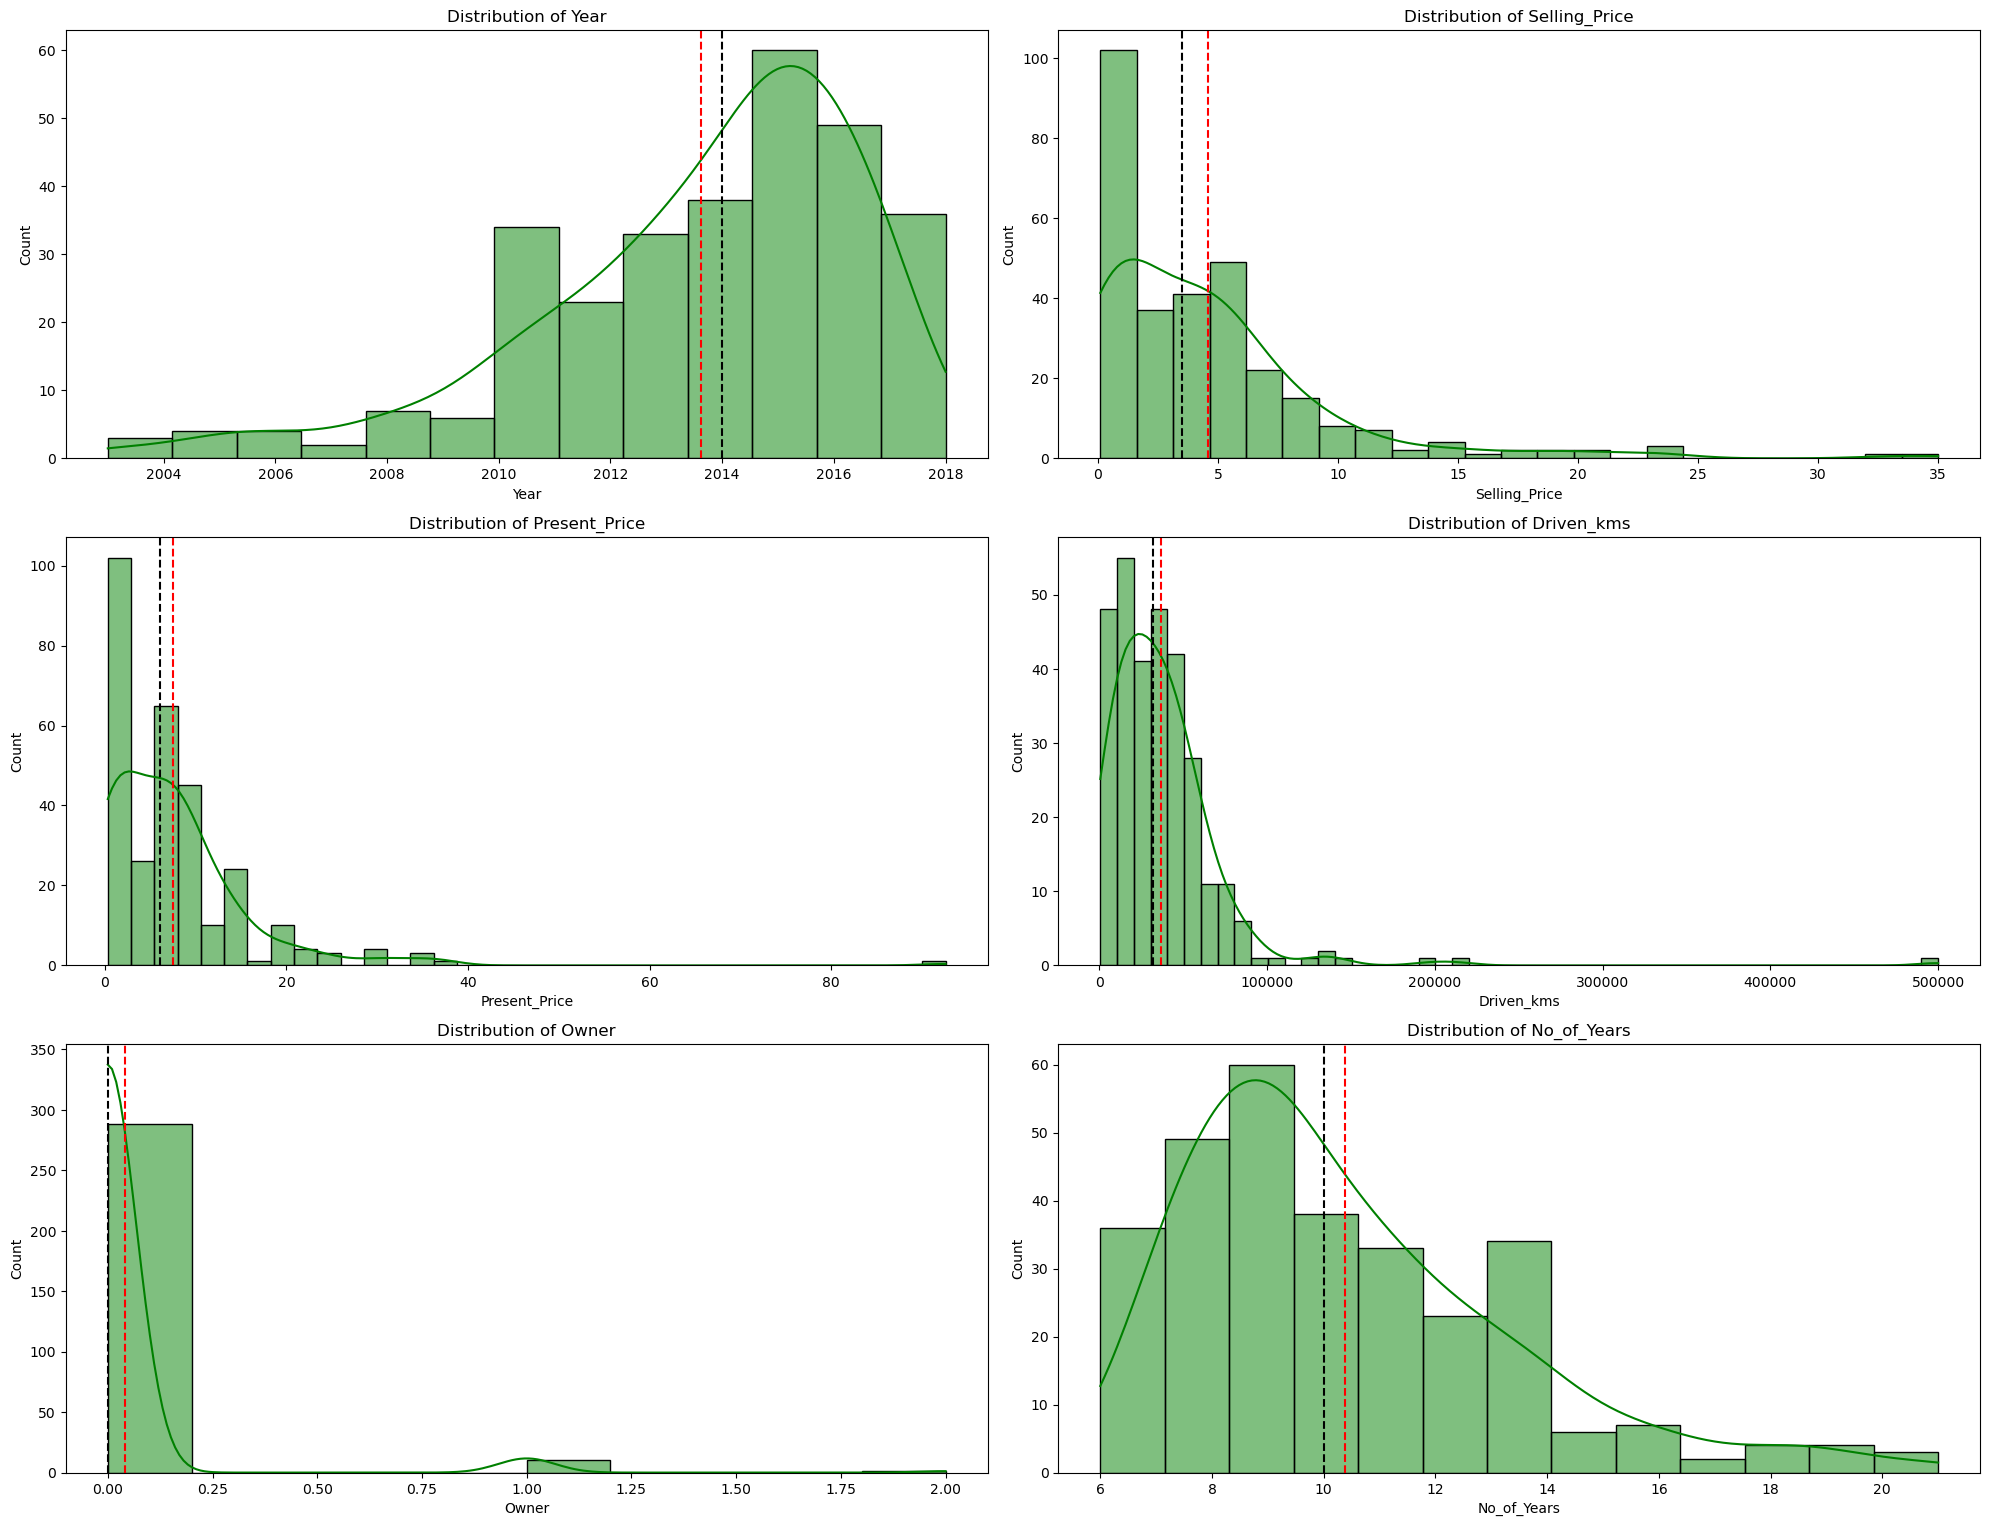

In [196]:
numeric_columns =data.select_dtypes('number')
plt.figure(figsize=(20,20))
for i ,e in enumerate(numeric_columns):
    plt.subplot(4,2,i+1)
    sns.histplot(data[e],kde=True,color='g')
    plt.axvline(data[e].mean(), color='r', linestyle='--')
    plt.axvline(data[e].median(), color='black', linestyle='--')
    plt.title('Distribution of '+e)
    plt.tight_layout()

mean > median (right-skewed)

In [197]:
data.select_dtypes('number').describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner,No_of_Years
count,299.00,299.00,299.00,299.00,299.00,299.00
mean,"2,013.62",4.59,7.54,"36,916.75",0.04,10.38
std,2.90,4.98,8.57,"39,015.17",0.21,2.90
min,"2,003.00",0.10,0.32,500.00,0.00,6.00
25%,"2,012.00",0.85,1.20,"15,000.00",0.00,8.00
50%,"2,014.00",3.51,6.10,"32,000.00",0.00,10.00
75%,"2,016.00",6.00,9.84,"48,883.50",0.00,12.00
max,"2,018.00",35.00,92.60,"500,000.00",2.00,21.00


  note that mean > median in table and graph


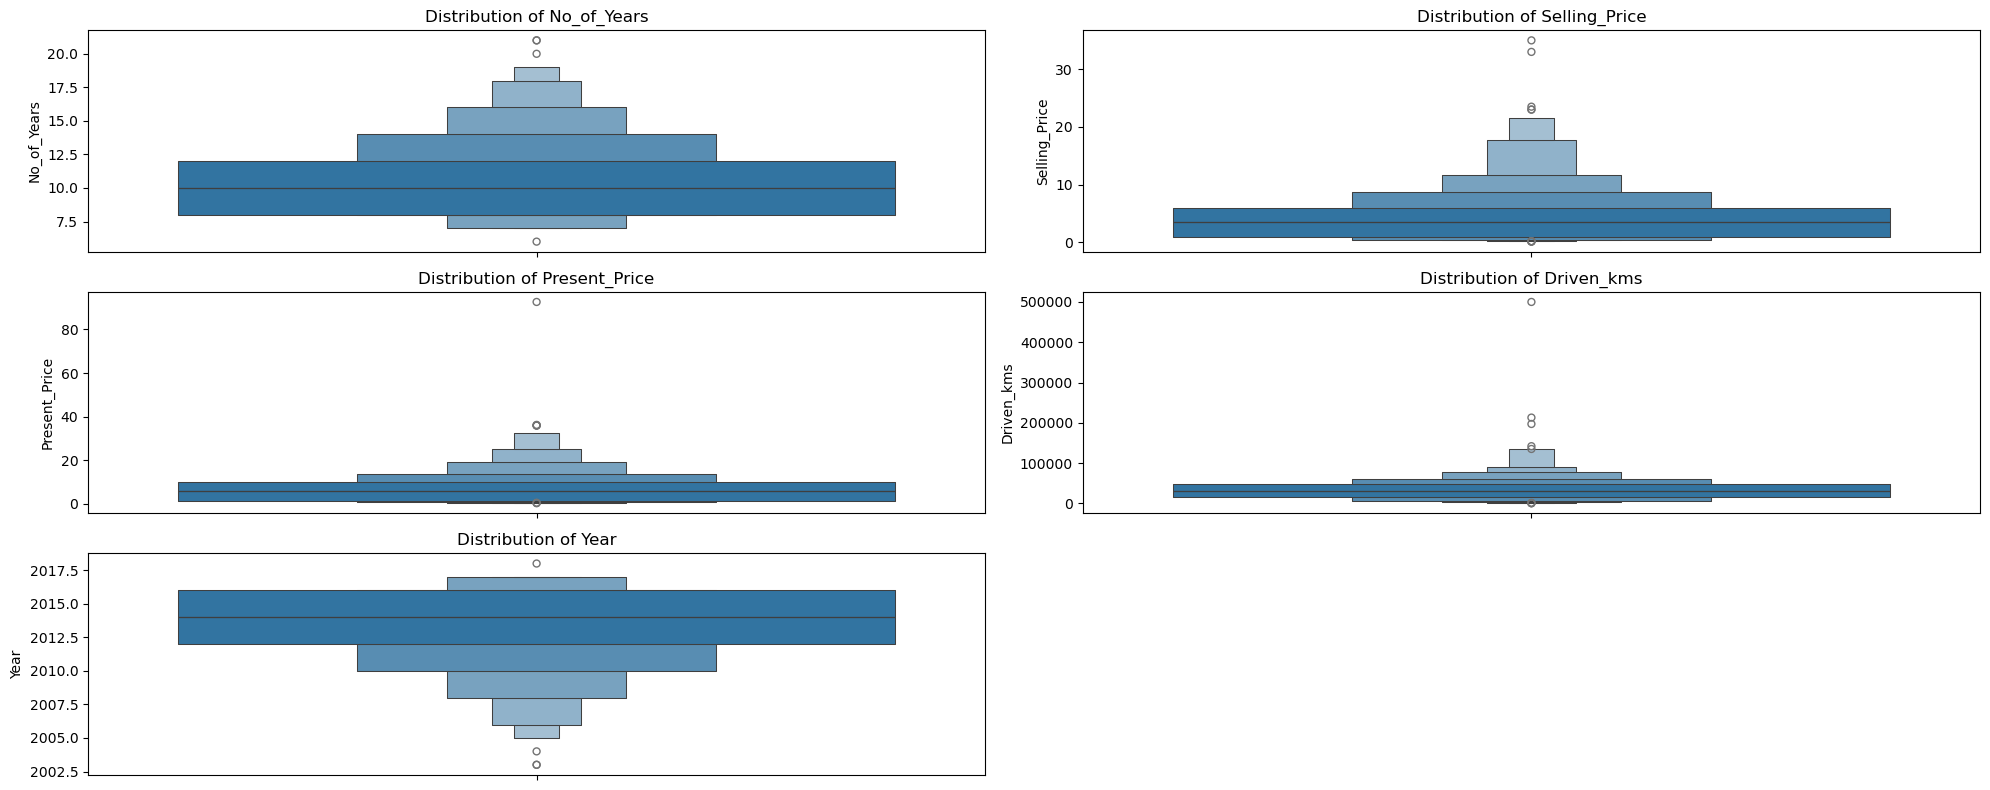

In [198]:
columns_to_plot =  ['No_of_Years', 'Selling_Price', 'Present_Price','Driven_kms','Year']
plt.figure(figsize=(20,8))
for i ,col in enumerate(columns_to_plot):
    plt.subplot(3,2,i+1)
    sns.boxenplot(data[col])
    plt.title('Distribution of '+col)
    plt.tight_layout()

2- Categorical Data (Bar Plot - Pie Chart)

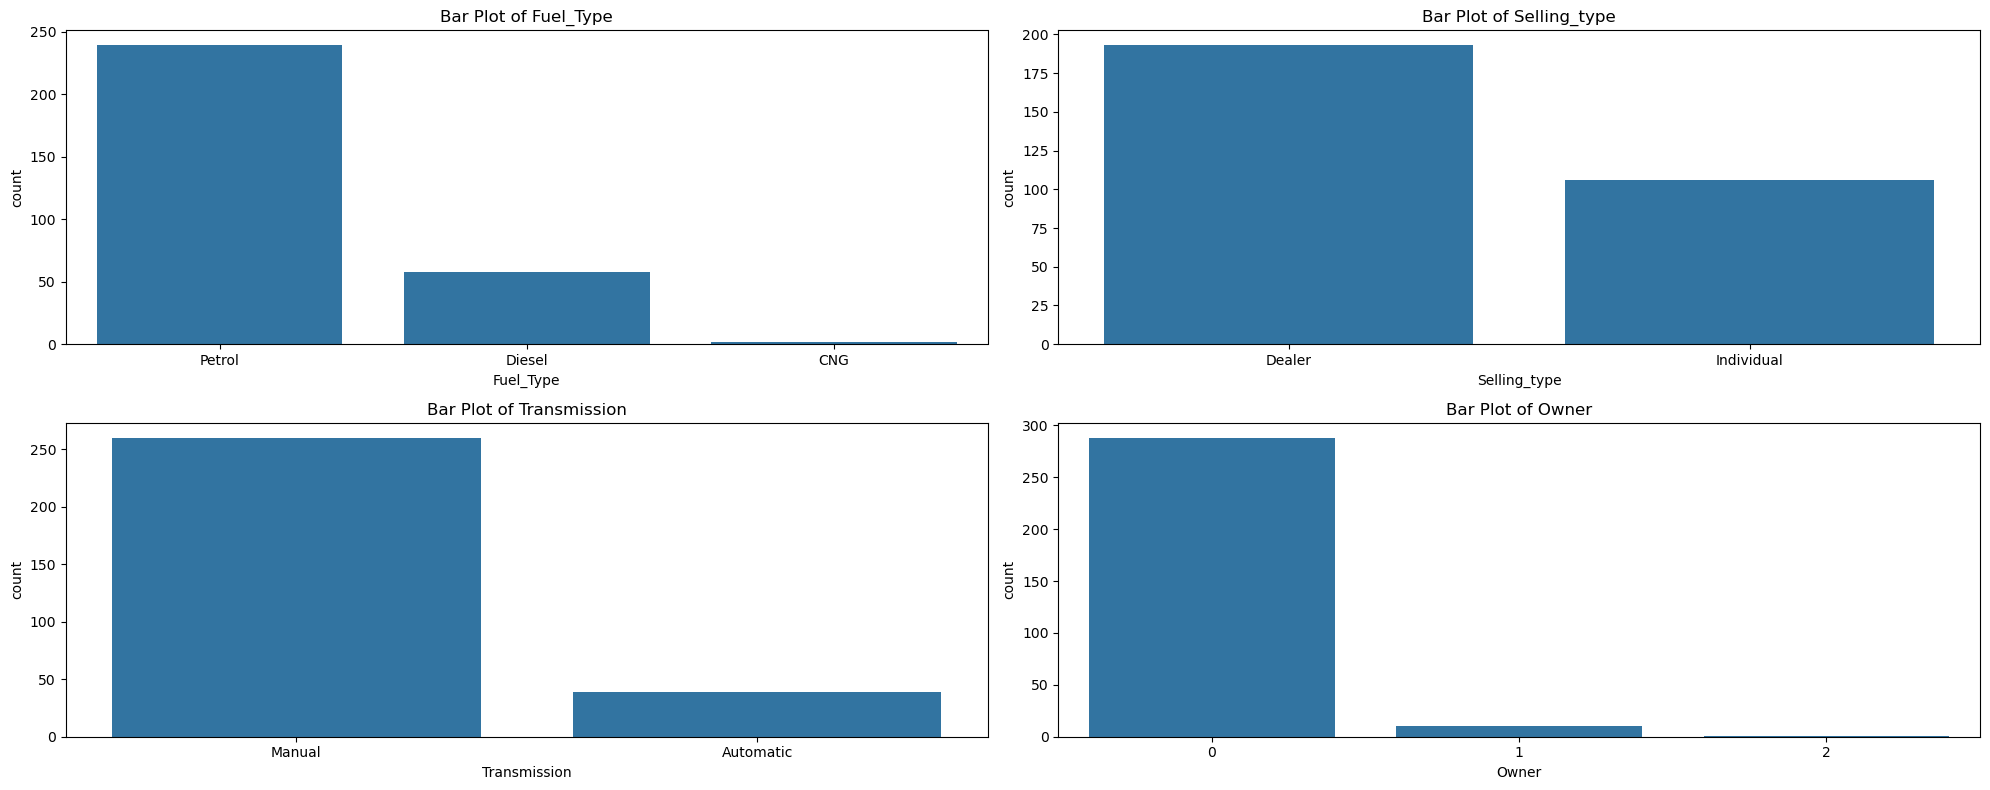

In [201]:
categorical_columns = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
plt.figure(figsize=(20,8))
for i ,col in enumerate(categorical_columns):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data[col])
    plt.title(f'Bar Plot of {col}')
    plt.tight_layout()
    

In [ ]:
categorical_columns = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
plt.figure(figsize=(20,8))
for i ,col in enumerate(categorical_columns):
    plt.subplot(2,2,i+1)
    v_c=data[col].value_counts()
    plt.pie(v_c,autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {col}')
    plt.tight_layout()    

# Bivariate Analysis

1- Numerical vs. Numerical (Correlation Matrix - Scatter Plot - Scatter Plot With a Trend Line)

In [202]:
correlation_matrix=numeric_columns.corr()
correlation_matrix

,Year,Selling_Price,Present_Price,Driven_kms,Owner,No_of_Years
Year,1.00,0.23,-0.05,-0.53,-0.17,-1.00
Selling_Price,0.23,1.00,0.88,0.03,-0.10,-0.23
Present_Price,-0.05,0.88,1.00,0.21,-0.02,0.05
Driven_kms,-0.53,0.03,0.21,1.00,0.06,0.53
Owner,-0.17,-0.10,-0.02,0.06,1.00,0.17
No_of_Years,-1.00,-0.23,0.05,0.53,0.17,1.00


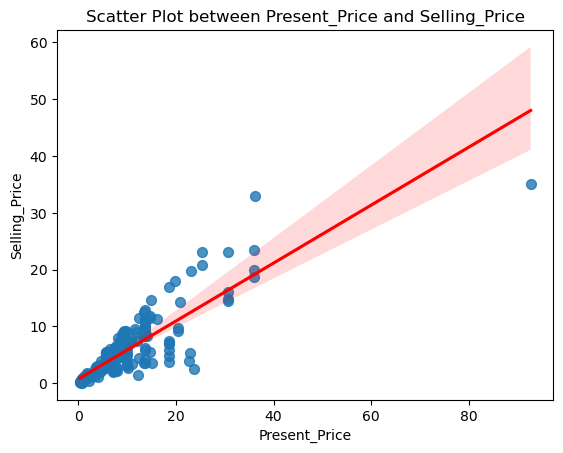

In [203]:
#regplot as scatter but with line 
sns.regplot(x='Present_Price', y='Selling_Price', data=data,scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('Scatter Plot between Present_Price and Selling_Price')
plt.xlabel('Present_Price')
plt.ylabel('Selling_Price')
plt.show()

Strong Correlation

In [204]:
# grouped_data = data.groupby('No_of_Years', as_index=False)['Selling_Price'].mean().round(2)
# fig = px.scatter(grouped_data, x='No_of_Years', y='Selling_Price', 
#                  title='Scatter plot of No of Years vs Selling Price with Trend Line')
# fig.add_traces(px.line(grouped_data, x='No_of_Years', y='Selling_Price').data)
# fig.show()


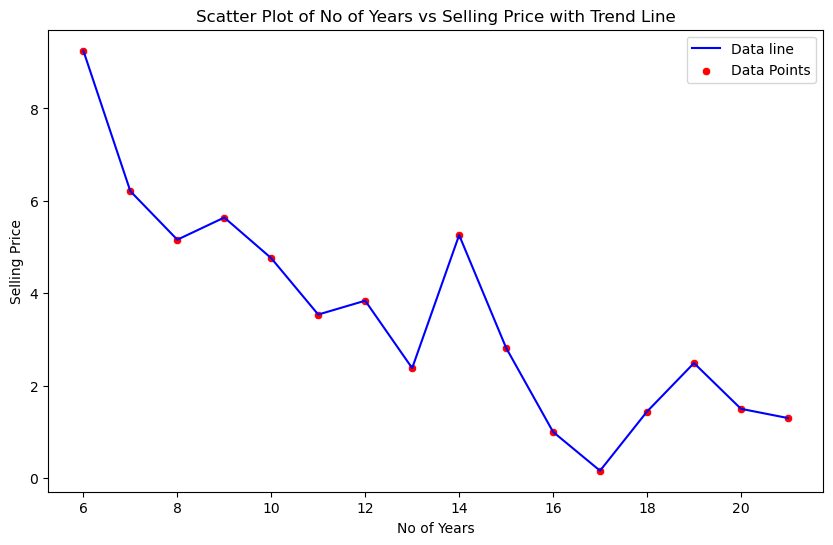

In [205]:
grouped_data = data.groupby('No_of_Years', as_index=False)['Selling_Price'].mean().round(2)
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='No_of_Years', y='Selling_Price', color='blue', label='Data line')
sns.scatterplot(data=grouped_data, x='No_of_Years', y='Selling_Price', color='red', label='Data Points')

plt.title('Scatter Plot of No of Years vs Selling Price with Trend Line')
plt.xlabel('No of Years')
plt.ylabel('Selling Price')
plt.legend()
plt.show()

In [206]:
# grouped_data = data.groupby('Year', as_index=False)['Selling_Price'].mean().round(2)
# fig = px.scatter(grouped_data, x='Year', y='Selling_Price', 
#                  title='Scatter plot of  Years vs Selling Price with Trend Line')
# fig.add_traces(px.line(grouped_data, x='Year', y='Selling_Price').data)

# fig.show()


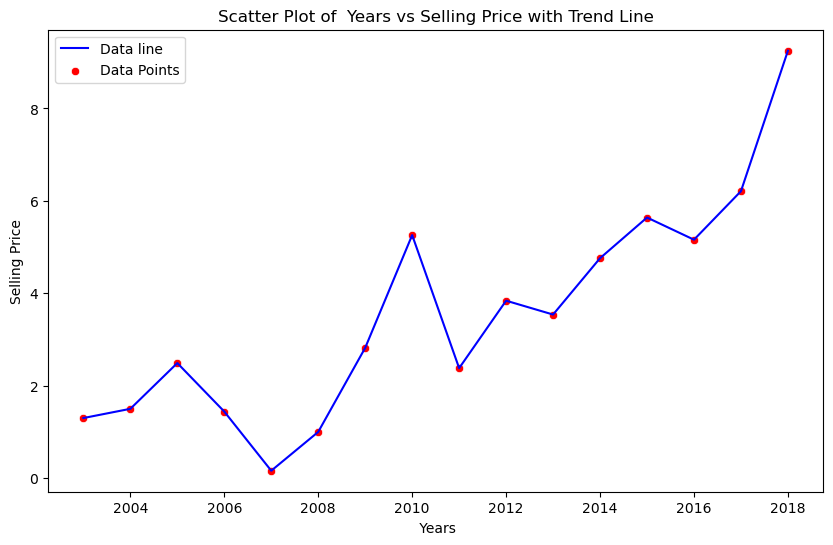

In [207]:
grouped_data = data.groupby('Year', as_index=False)['Selling_Price'].mean().round(2)
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_data, x='Year', y='Selling_Price', color='blue', label='Data line')
sns.scatterplot(data=grouped_data, x='Year', y='Selling_Price', color='red', label='Data Points')

plt.title('Scatter Plot of  Years vs Selling Price with Trend Line')
plt.xlabel(' Years')
plt.ylabel('Selling Price')
plt.legend()
plt.show()

 2- Numerical vs. Categorical (Box Plot)

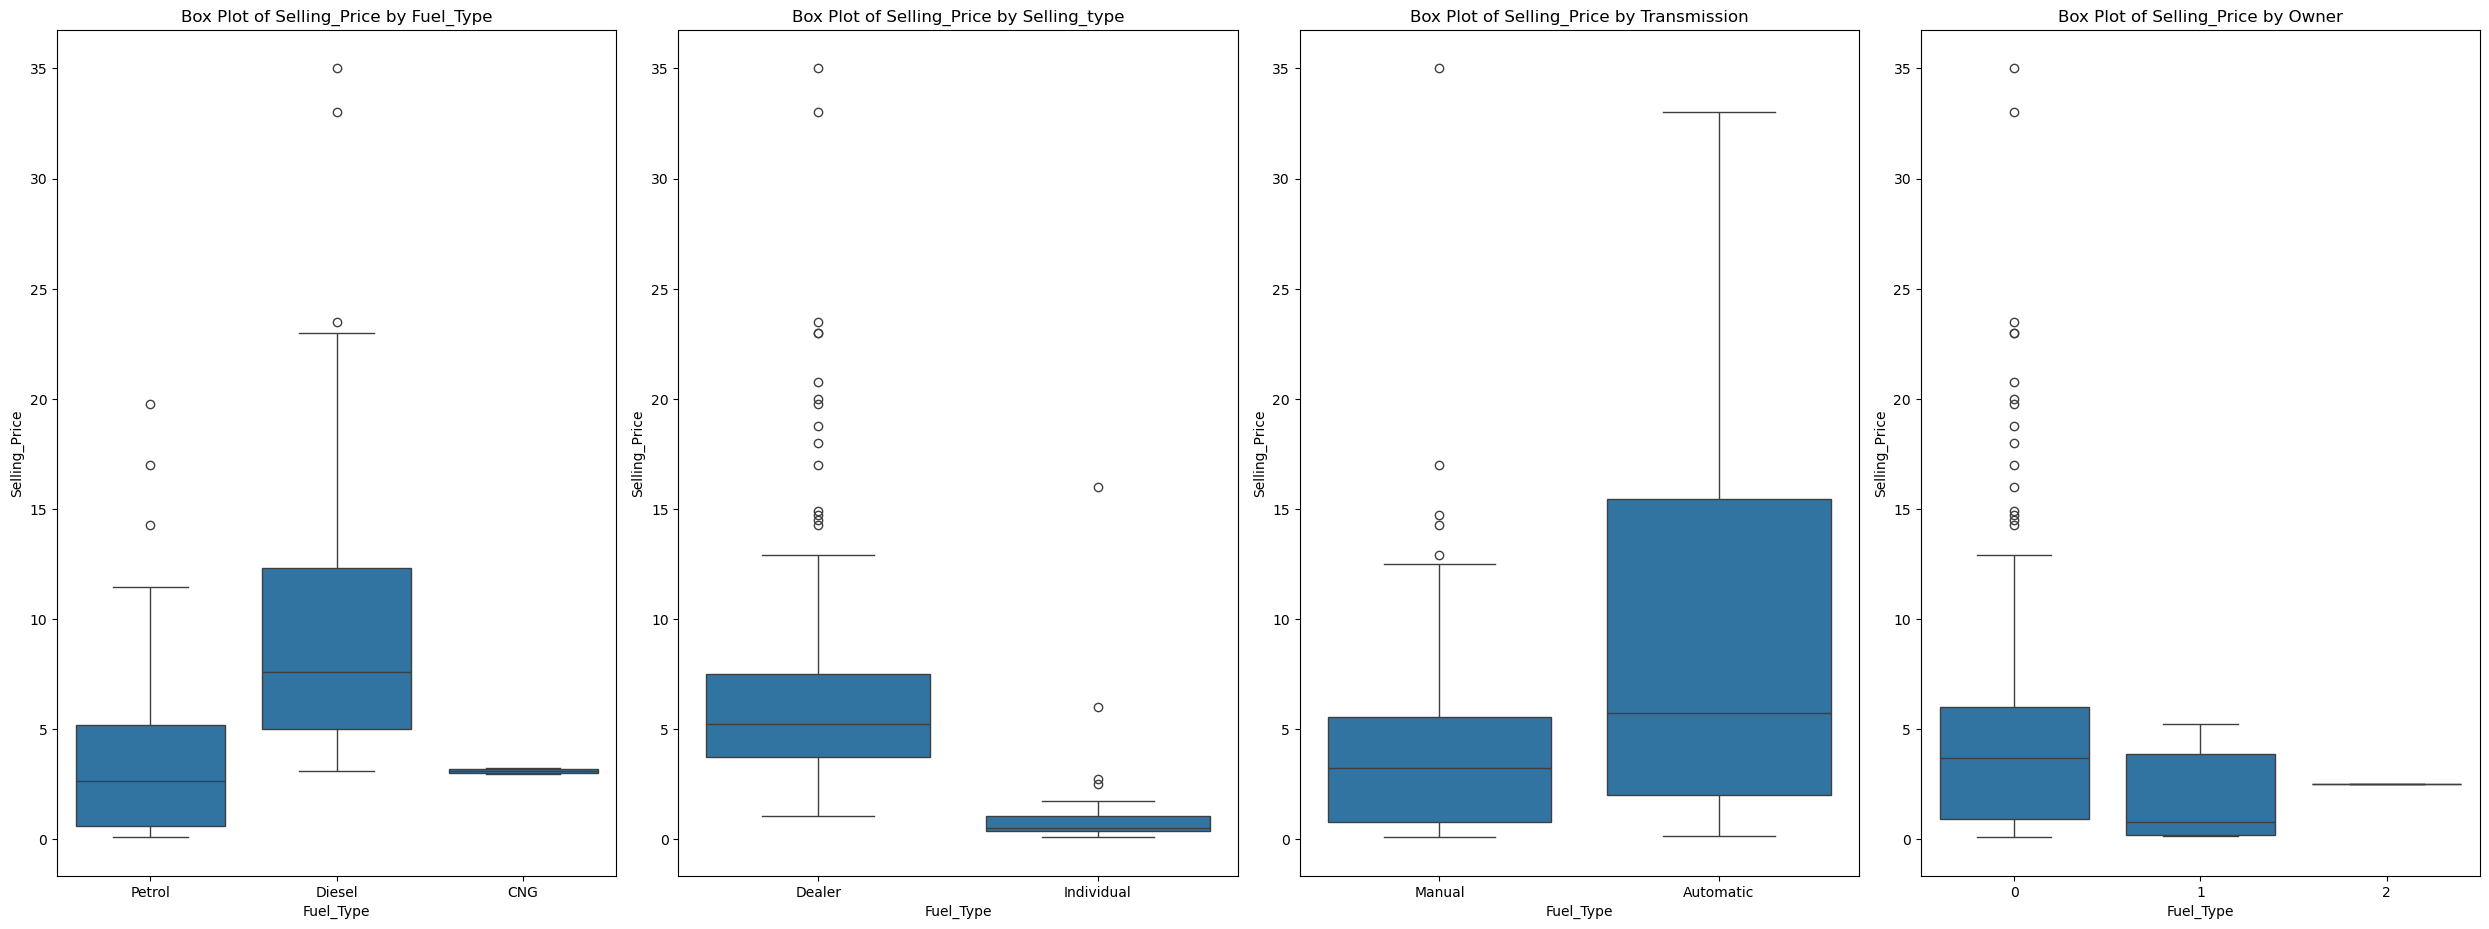

In [208]:
# Distribution of Selling_Price across different Fuel_Types
plt.figure(figsize=(25, 18))
for i ,col in enumerate(categorical_columns):
    plt.subplot(2,len(categorical_columns),i+1)
    sns.boxplot(x=data[col], y='Selling_Price', data=data)
    plt.title(f'Box Plot of Selling_Price by {col}')
    plt.xlabel('Fuel_Type')
    plt.tight_layout()


3- Categorical vs. Categorical (Cross-tabulation - Stacked Bar Plot)

In [209]:
pd.crosstab(data['Fuel_Type'], data['Transmission'])


Transmission,Automatic,Manual
Fuel_Type,,
CNG,0,2
Diesel,11,47
Petrol,28,211


displays the frequency distribution of the variables Fuel_Type and Transmission

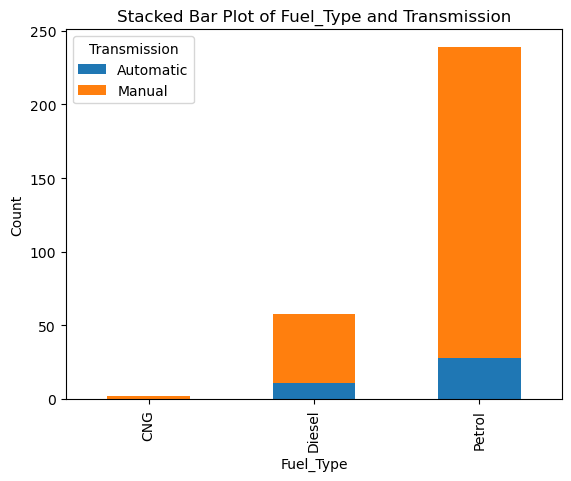

In [210]:
pd.crosstab(data['Fuel_Type'], data['Transmission']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot of Fuel_Type and Transmission')
plt.xlabel('Fuel_Type')
plt.ylabel('Count')
plt.show()

# Multivariate Analysis

(Pair Plot - Heatmap)

Text(0.5, 1.0, 'Correlation between effictif features')

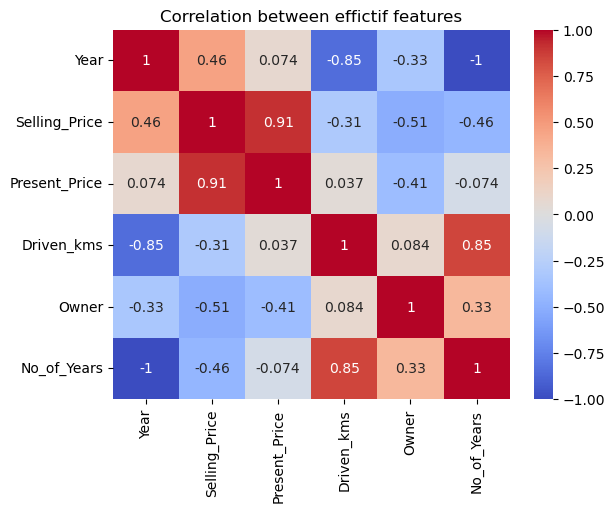

In [211]:
sns.heatmap(correlation_matrix.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation between effictif features')

Strong correlation between Selling_price & Present_price

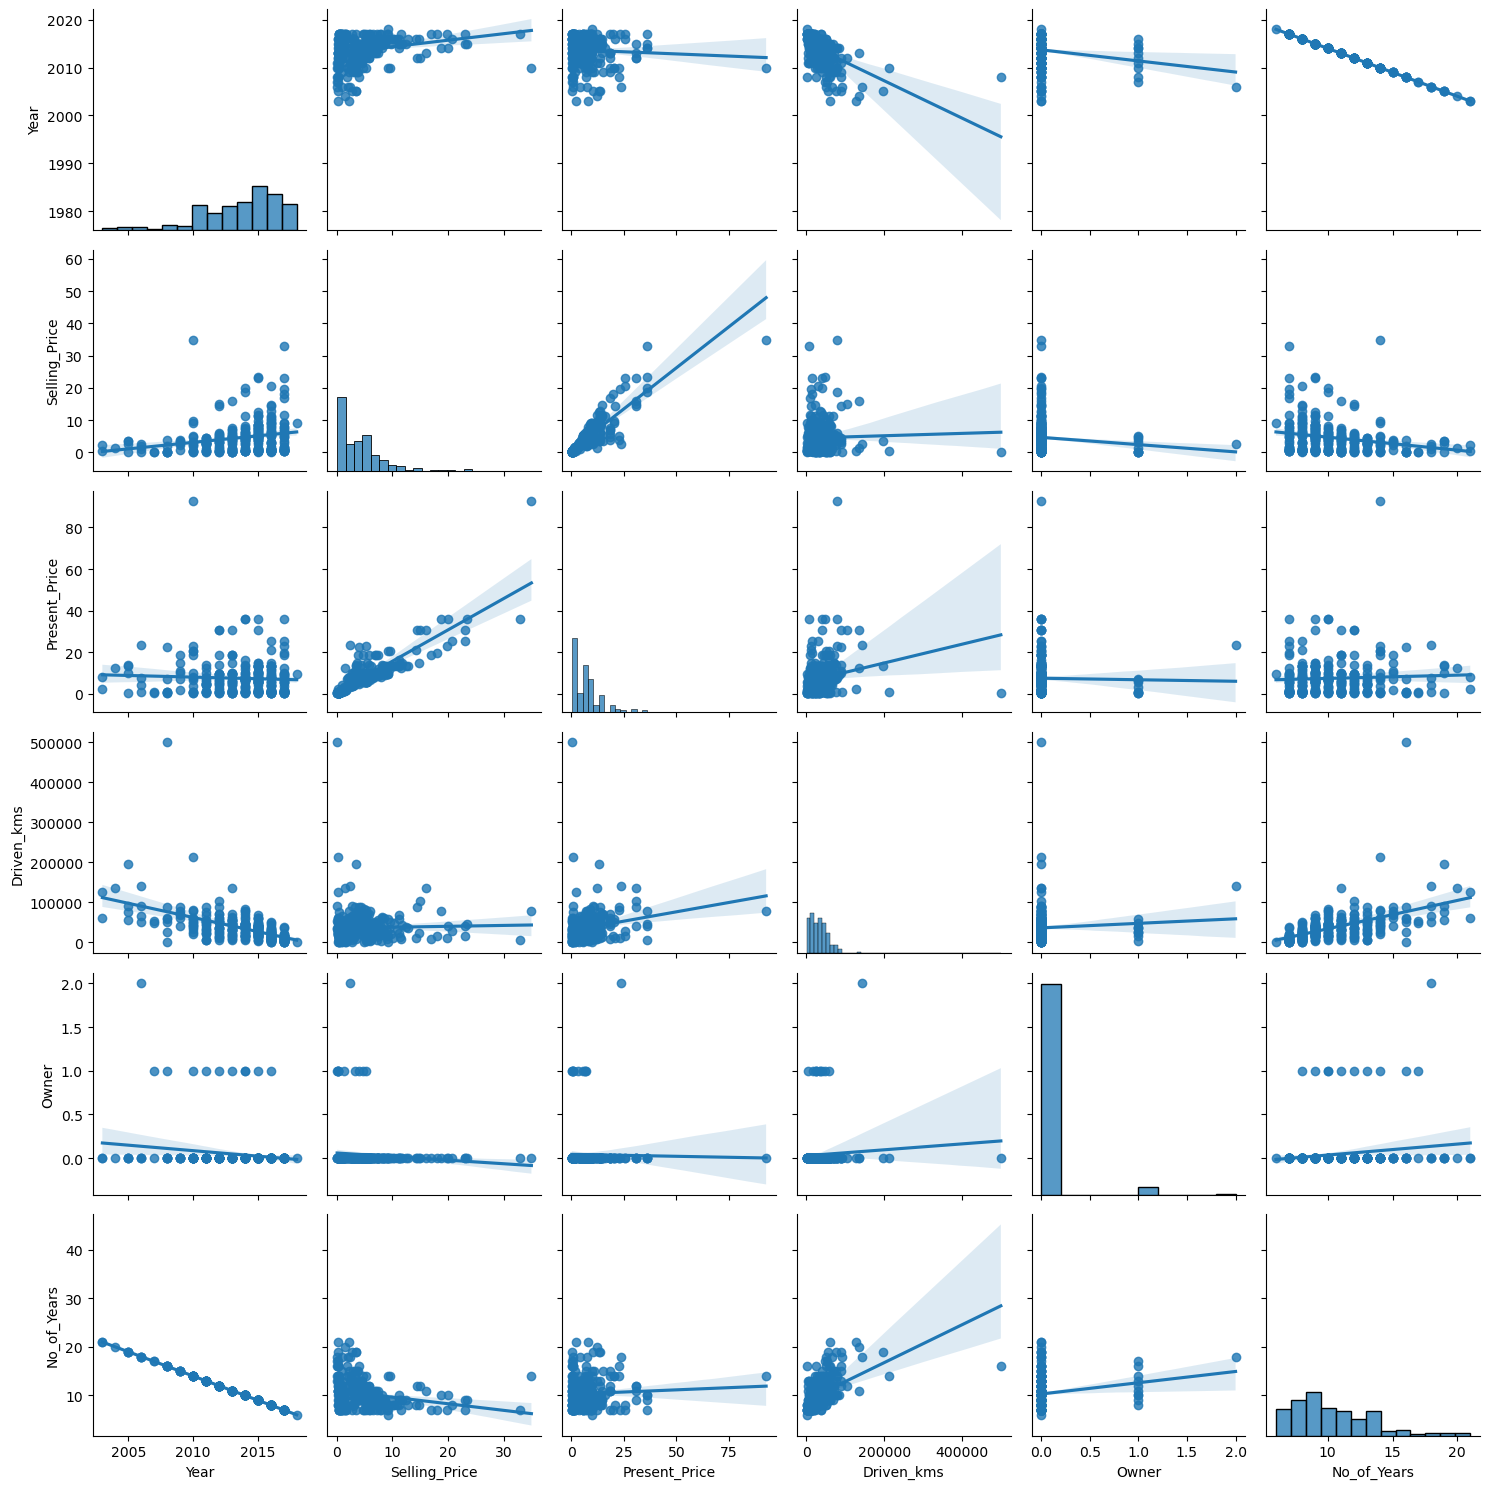

In [34]:
sns.pairplot(data.select_dtypes('number'),kind='reg')
plt.tight_layout()

# Outliers

In [212]:
Q1 = data['Present_Price'].quantile(0.25)
Q3 = data['Present_Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - IQR*1.5
upper_bound = Q3 + IQR*1.5

# outliers = New_data[(New_data['Present_Price'] > upper_bound) | (New_data['Present_Price'] < lower_bound)]
outliers = data[data.Present_Price > 25.39]

outliers_count = outliers.count()
outliers_count

Year             9
Selling_Price    9
Present_Price    9
Driven_kms       9
Fuel_Type        9
Selling_type     9
Transmission     9
Owner            9
No_of_Years      9
dtype: int64

In [213]:
outliers = data[data.Present_Price > 25.39]
data_clean =data[~(data.Present_Price > 25.39)]
data_clean

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,No_of_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


In [214]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 50 to 86
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           9 non-null      int64  
 1   Selling_Price  9 non-null      float64
 2   Present_Price  9 non-null      float64
 3   Driven_kms     9 non-null      int64  
 4   Fuel_Type      9 non-null      object 
 5   Selling_type   9 non-null      object 
 6   Transmission   9 non-null      object 
 7   Owner          9 non-null      int64  
 8   No_of_Years    9 non-null      int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 720.0+ bytes


In [215]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           290 non-null    int64  
 1   Selling_Price  290 non-null    float64
 2   Present_Price  290 non-null    float64
 3   Driven_kms     290 non-null    int64  
 4   Fuel_Type      290 non-null    object 
 5   Selling_type   290 non-null    object 
 6   Transmission   290 non-null    object 
 7   Owner          290 non-null    int64  
 8   No_of_Years    290 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 22.7+ KB


<Axes: xlabel='Present_Price'>

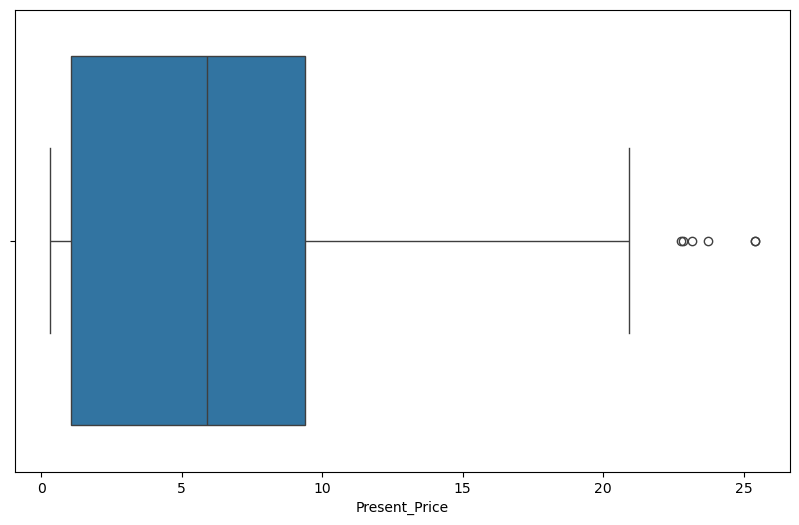

In [216]:
# px.box(data_frame=data_clean,x='Present_Price')
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_clean,x='Present_Price') 

# Normality

- **Box-Cox Transformation**:
  - **Purpose**: Normalize data, reduce skewness, and stabilize variance.
  - **Use**: When data is highly skewed and positive. Ideal for preparing data for models that assume normality.

- **Square Root Transformation**:
  - **Purpose**: Reduce moderate skewness and stabilize variance.
  - **Use**: For non-negative data, especially count data, where a simpler transformation is sufficient. 

Both transformations are used to make data more suitable for modeling by addressing issues like skewness and variance instability.

In [218]:
from scipy.stats import boxcox

#  Box-Cox transformation to both 'Present_Price' and 'Selling_Price' 
data_clean.loc[:, 'Present_Price_transformed'], _ = boxcox(data_clean['Present_Price'] + 1)
data_clean.loc[:, 'Selling_Price_transformed'], _ = boxcox(data_clean['Selling_Price'] + 1)
#square root for Driven-kms
data_clean.loc[:, 'Driven_kms_sqrt'] = np.sqrt(data_clean['Driven_kms'])

Plot the original and transformed columns using kdeplot

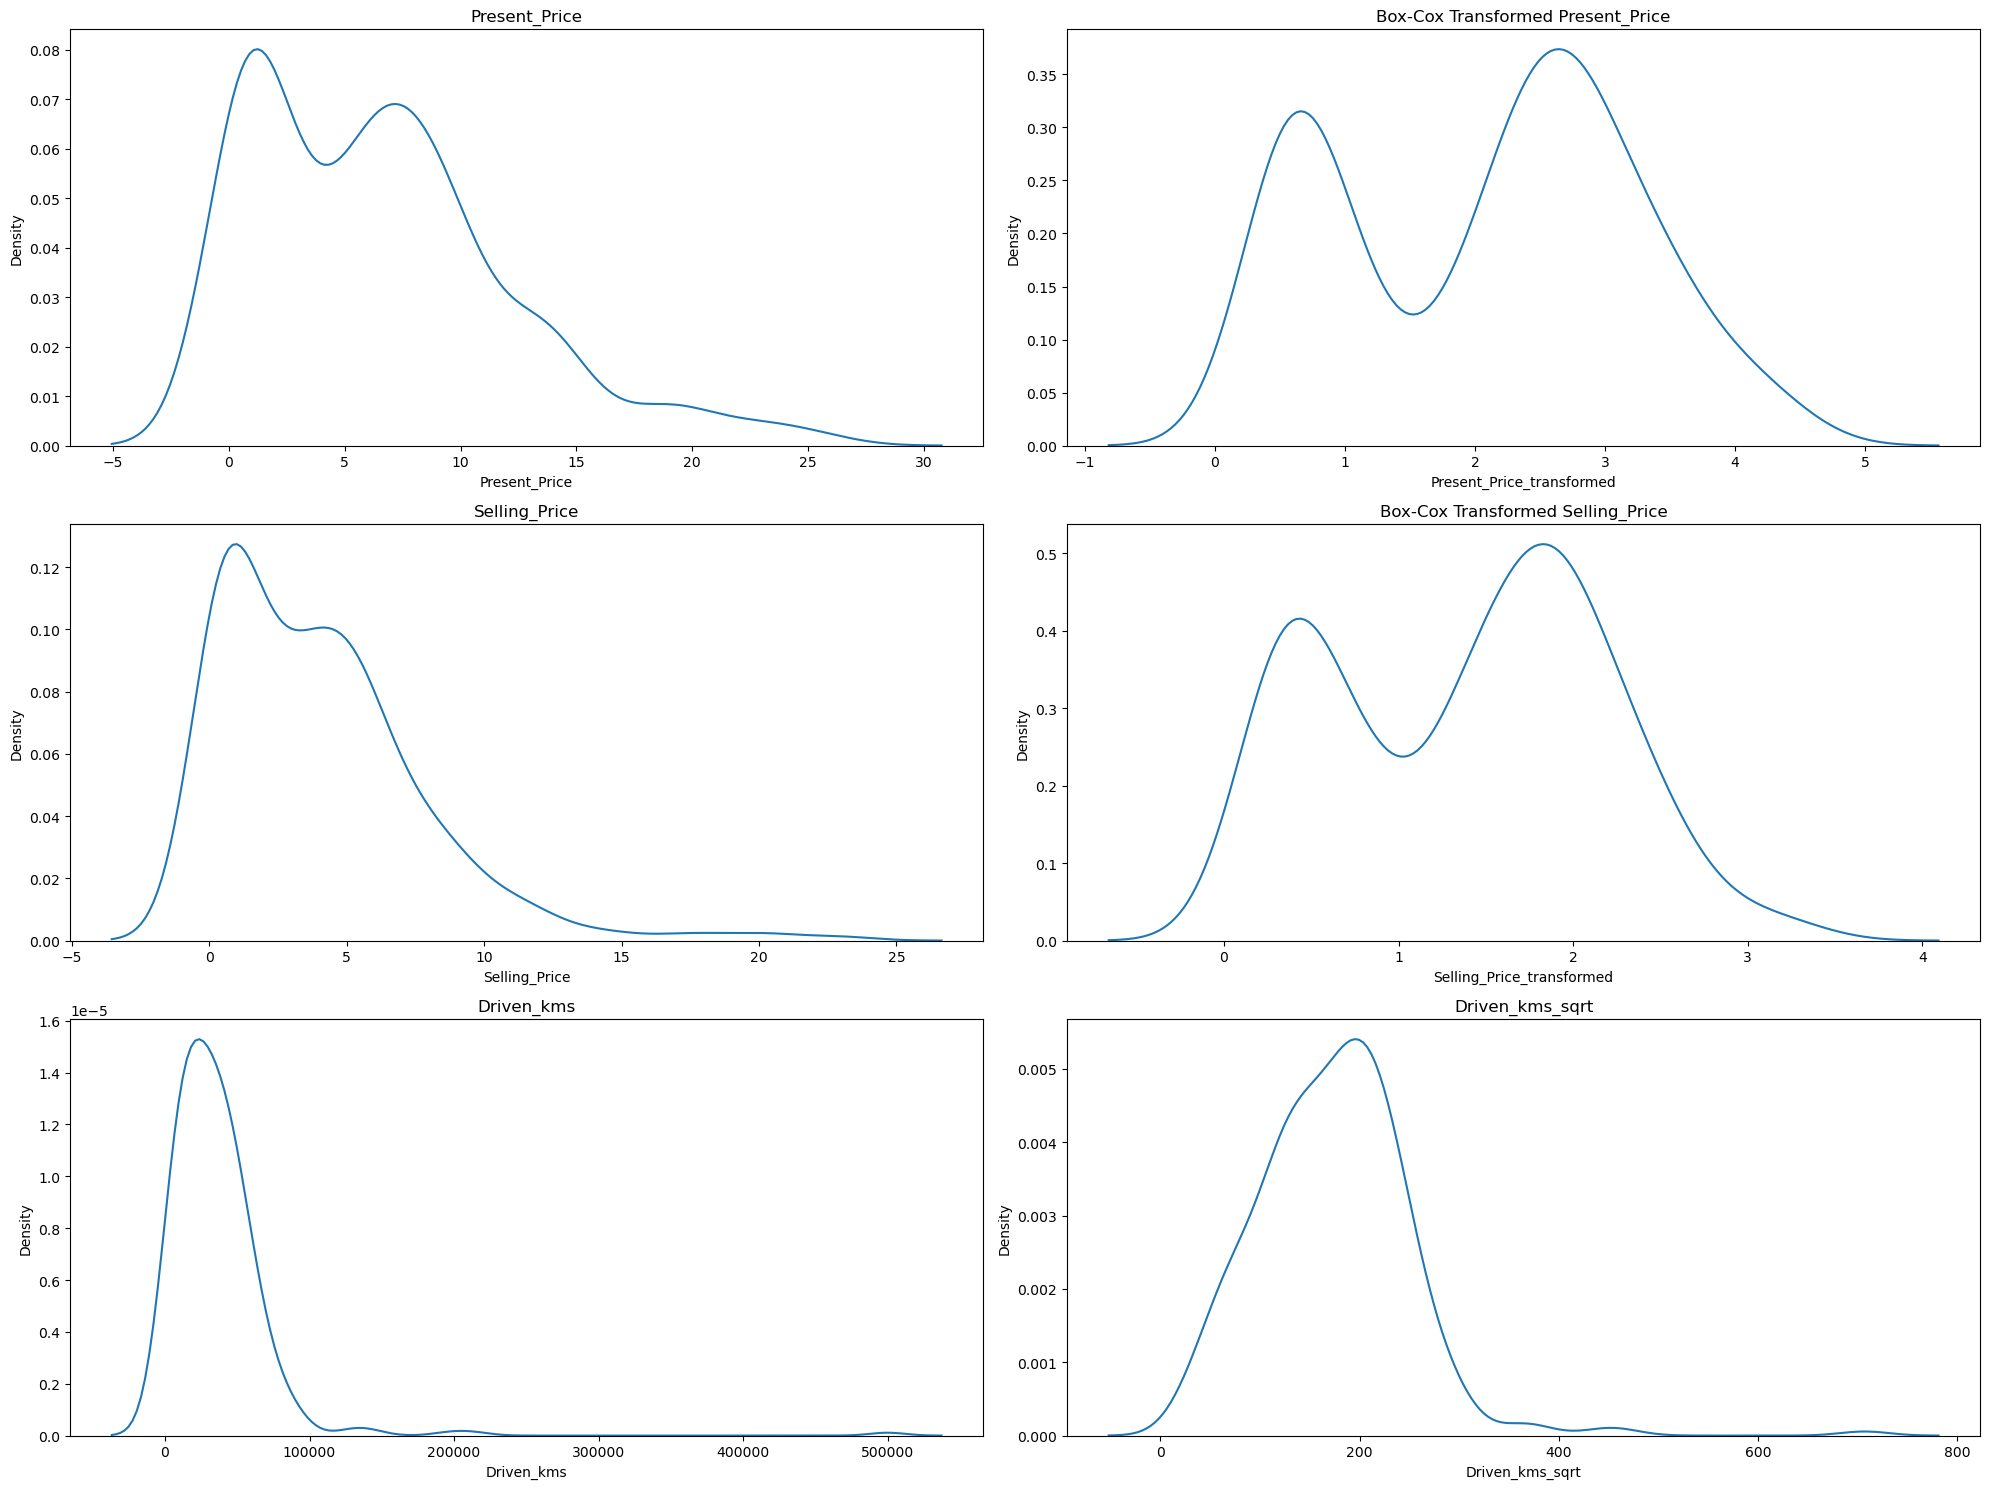

In [219]:

plt.figure(figsize=(20, 15))

plt.subplot(3, 2, 1)
sns.kdeplot(data=data_clean, x='Present_Price')
plt.title('Present_Price')

plt.subplot(3, 2, 2)
sns.kdeplot(data=data_clean, x='Present_Price_transformed')
plt.title('Box-Cox Transformed Present_Price')

plt.subplot(3, 2, 3)
sns.kdeplot(data=data_clean, x='Selling_Price')
plt.title('Selling_Price')

plt.subplot(3, 2, 4)
sns.kdeplot(data=data_clean, x='Selling_Price_transformed')
plt.title('Box-Cox Transformed Selling_Price')

plt.subplot(3, 2, 5)
sns.kdeplot(data=data_clean, x='Driven_kms')
plt.title('Driven_kms')

plt.subplot(3, 2, 6)
sns.kdeplot(data=data_clean, x='Driven_kms_sqrt')
plt.title('Driven_kms_sqrt')

plt.tight_layout()
plt.show()


# Kurtosis 
Kurtosis measures how much the tails of a data distribution differ from a normal distribution. 

- **High Kurtosis**: Tails are heavy, meaning there are more extreme values (outliers) than usual.
- **Low Kurtosis**: Tails are light, meaning there are fewer extreme values than usual.
- **Normal Kurtosis**: Tails are similar to those of a normal distribution, with a balanced number of outliers.



In [220]:
from scipy.stats import kurtosis
kurtosis_present_price = kurtosis(data_clean['Present_Price'])
kurtosis_selling_price = kurtosis(data_clean['Selling_Price'])
kurtosis_Driven_kms = kurtosis(data_clean['Driven_kms'])

print(f"Kurtosis of Present_Price: {kurtosis_present_price}")
print(f"Kurtosis of Selling_Price: {kurtosis_selling_price}")
print(f"Kurtosis of Driven_kms: {kurtosis_Driven_kms}")


Kurtosis of Present_Price: 0.7768684598078957
Kurtosis of Selling_Price: 4.182781604796288
Kurtosis of Driven_kms: 72.34036114182679



#### **Before Transformation:**

1. **Present_Price:**
   - **Kurtosis**: 0.7769
   - **Interpretation**: **Mesokurtic**. The distribution is close to normal with moderate peak and tails.

2. **Selling_Price:**
   - **Kurtosis**: 4.1828
   - **Interpretation**: **Leptokurtic**. This indicates a distribution with a higher peak and heavier tails, suggesting a greater presence of extreme values.

3. **Driven_kms:**
   - **Kurtosis**: 72.3404
   - **Interpretation**: **Highly Leptokurtic**. This extreme kurtosis shows a distribution with a very sharp peak and extremely heavy tails, indicating many extreme values and outliers.



In [221]:

kurtosis_present_price_transformed = kurtosis(data_clean['Present_Price_transformed'])
kurtosis_selling_price_transformed = kurtosis(data_clean['Selling_Price_transformed'])
kurtosis_Driven_kms_sqrt = kurtosis(data_clean['Driven_kms_sqrt'])

print(f"Kurtosis of Present_Price_transformed: {kurtosis_present_price_transformed}")
print(f"Kurtosis of Selling_Price_transformed: {kurtosis_selling_price_transformed}")
print(f"Kurtosis of Driven_kms_sqrt: {kurtosis_Driven_kms_sqrt}")


Kurtosis of Present_Price_transformed: -1.1828042960228728
Kurtosis of Selling_Price_transformed: -1.035266774316057
Kurtosis of Driven_kms_sqrt: 7.824823450468216


#### **After Transformation:**

1. **Present_Price_transformed:**
   - **Kurtosis**: -1.1828
   - **Interpretation**: **Platykurtic**. The transformed distribution is flatter than normal, with fewer extreme values compared to the original Present_Price.

2. **Selling_Price_transformed:**
   - **Kurtosis**: -1.0353
   - **Interpretation**: **Platykurtic**. The transformed Selling_Price also shows a flatter distribution with fewer extreme values, improving the normality of the data.

3. **Driven_kms_sqrt:**
   - **Kurtosis**: 7.8248
   - **Interpretation**: **Leptokurtic**. Although the transformation made the distribution less extreme compared to the original, it still has heavy tails and a higher peak, indicating a significant presence of extreme values.


Conclusion: After Transformation: The transformed data generally shows improvements in terms of reducing extreme values, making it closer to normal distribution. This is usually beneficial for model performance

In [222]:
data_clean.drop(columns=['Driven_kms','Selling_Price','Present_Price'], inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24308\361000944.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
data_clean.columns

Index(['Year', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner',
       'No_of_Years', 'Present_Price_transformed', 'Selling_Price_transformed',
       'Driven_kms_sqrt'],
      dtype='object')

In [224]:
from sklearn.preprocessing import LabelEncoder

data_clean = data_clean.copy()
le = LabelEncoder()

#  LabelEncoder to each column
data_clean['Fuel_Type'] = le.fit_transform(data_clean['Fuel_Type'])
data_clean['Selling_type'] = le.fit_transform(data_clean['Selling_type'])
data_clean['Transmission'] = le.fit_transform(data_clean['Transmission'])

data_clean.head()


,Year,Fuel_Type,Selling_type,Transmission,Owner,No_of_Years,Present_Price_transformed,Selling_Price_transformed,Driven_kms_sqrt
0,2014,2,0,1,0,10,2.25,1.50,164.32
1,2013,1,0,1,0,11,2.94,1.80,207.36
2,2017,2,0,1,0,7,2.98,2.18,83.07
3,2011,2,0,1,0,13,1.91,1.38,72.11
4,2014,1,0,1,0,10,2.50,1.77,206.03


In [225]:
data_clean.dtypes

Year                           int64
Fuel_Type                      int32
Selling_type                   int32
Transmission                   int32
Owner                          int64
No_of_Years                    int64
Present_Price_transformed    float64
Selling_Price_transformed    float64
Driven_kms_sqrt              float64
dtype: object

# Correlations_After_Encoding

Text(0.5, 1.0, 'Correlation after Label Encoding')

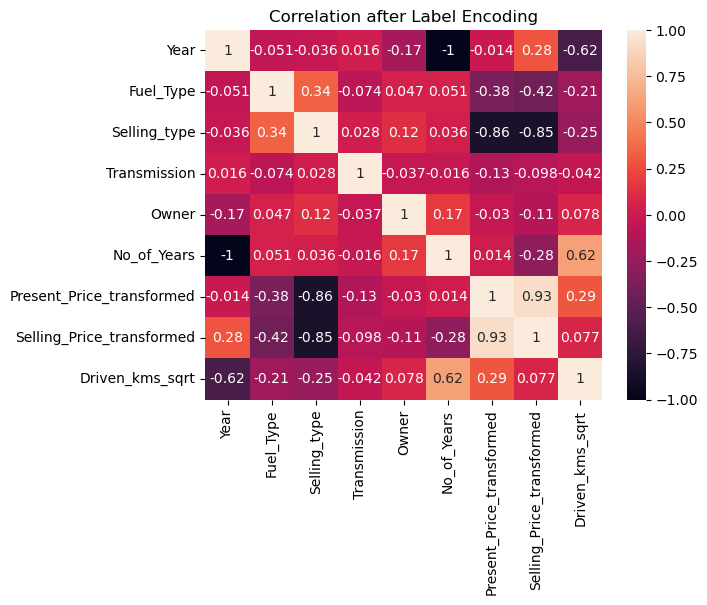

In [226]:
sns.heatmap(data_clean.corr(),annot=True)
plt.title('Correlation after Label Encoding')

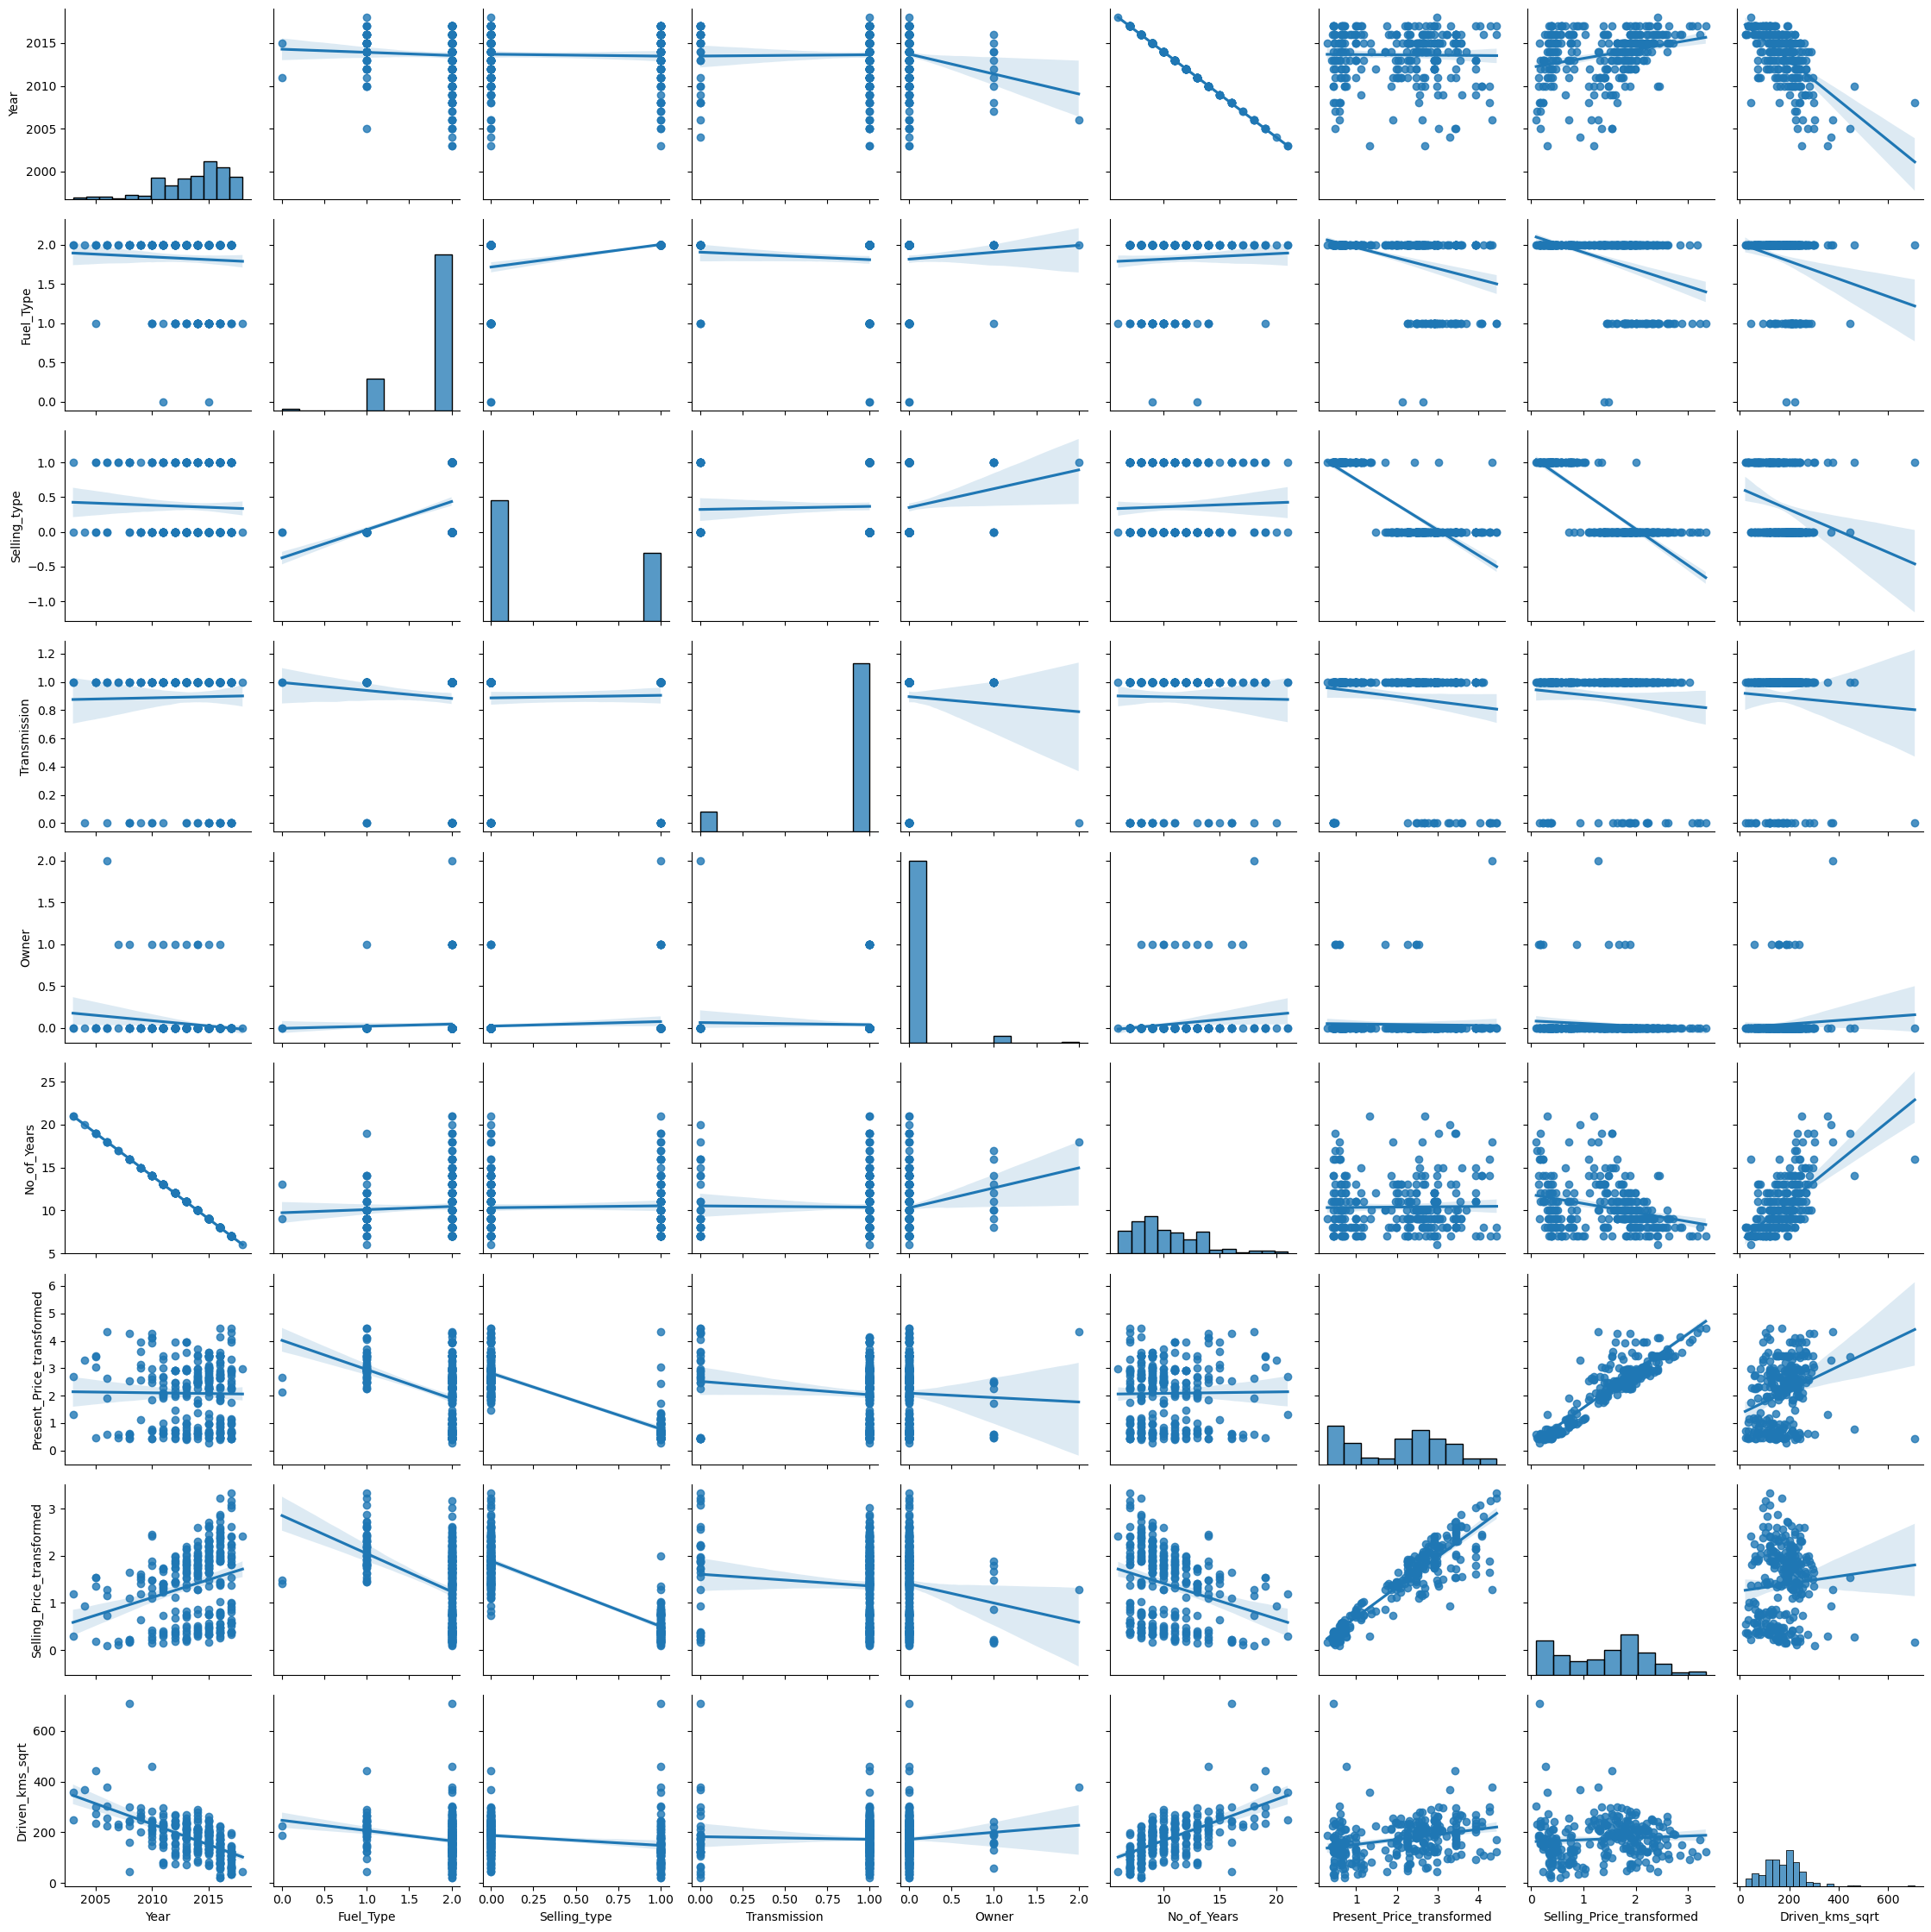

In [227]:
sns.pairplot(data_clean,kind='reg')
plt.tight_layout()

# Multivariate Regression Analysis
Multivariate Regression: Analyze the relationship between one dependent variable and multiple independent variables.

In [228]:
import statsmodels.api as sm
x = data_clean.drop(['Selling_Price_transformed'],axis=1) 
y = data_clean['Selling_Price_transformed']

In [229]:
x = sm.add_constant(x)

In [230]:
model = sm.OLS(y, x).fit()

In [231]:
x.columns

Index(['const', 'Year', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner',
       'No_of_Years', 'Present_Price_transformed', 'Driven_kms_sqrt'],
      dtype='object')

# Assumptions in Ordinary Least Squares (OLS) regression

                                        1- Normality of Residuals

In [232]:
residuals = model.resid

* Anderson-Darling

In [233]:
#  Anderson-Darling test on residuals
from scipy.stats import anderson

result_residuals = anderson(residuals, dist='norm')
print("Results for OLS Residuals:")
print(f"Anderson-Darling Test Statistic: {round(result_residuals.statistic, 4)}")
print(f"Critical Values: {result_residuals.critical_values}")
print(f"Significance Levels: {result_residuals.significance_level}")


Results for OLS Residuals:
Anderson-Darling Test Statistic: 0.5968
Critical Values: [0.568 0.647 0.777 0.906 1.077]
Significance Levels: [15.  10.   5.   2.5  1. ]


The Anderson-Darling test statistic for the OLS residuals is 0.5968.

- **At the 15% significance level**: The test statistic (0.5968) is slightly above the critical value (0.568). This indicates a minor deviation from normality, but it's minimal.
- **At the 10% significance level**: The test statistic (0.5968) is below the critical value (0.647). Thus, we do not reject the null hypothesis, suggesting the residuals are consistent with normality at this level.
- **At the 5%, 2.5%, and 1% significance levels**: The test statistic is below the critical values (0.777, 0.906, and 1.077, respectively). Therefore, we do not reject the null hypothesis at these levels, meaning the residuals are close to a normal distribution.

*  Shapiro-Wilk

In [234]:
from scipy.stats import shapiro
# Perform Shapiro-Wilk test on residuals
stat, p_value = shapiro(residuals)
print("Results for OLS Residuals:")
print(f"Shapiro-Wilk Test Statistic: {round(stat, 4)}")
print(f"p-value: {round(p_value, 4)}")

# Interpretation
if p_value > 0.05:
    print("Conclusion: The residuals are likely normally distributed (fail to reject the null hypothesis)")
else:
    print("Conclusion: The residuals are not normally distributed (reject the null hypothesis)")


Results for OLS Residuals:
Shapiro-Wilk Test Statistic: 0.9908
p-value: 0.0672
Conclusion: The residuals are likely normally distributed (fail to reject the null hypothesis)


 * Histogram of Residuals

<Axes: ylabel='Density'>

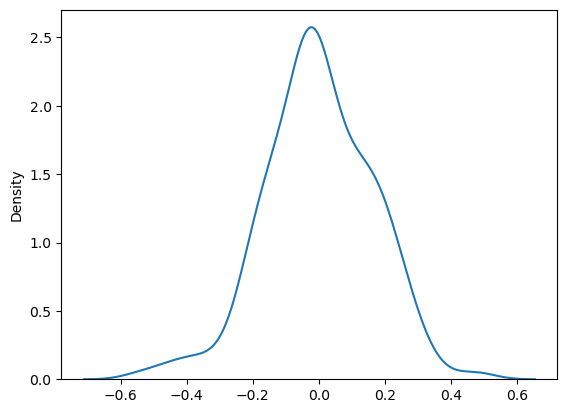

In [235]:
sns.kdeplot(residuals)

* QQ Plot 

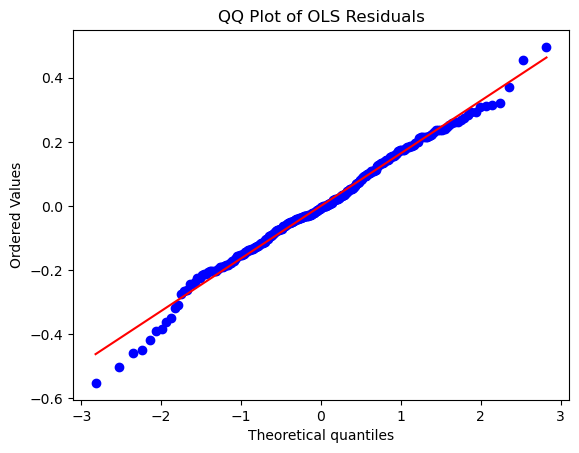

In [236]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ Plot of OLS Residuals")
plt.show()

                                              2-Independence

The Durbin-Watson Statistic (DW) ranges from 0 to 4:

- **A value of 2** indicates no autocorrelation in the residuals.
- **Values closer to 0** suggest positive autocorrelation, meaning the residuals are positively correlated.
- **Values closer to 4** indicate negative autocorrelation, meaning the residuals are negatively correlated.

In [237]:
dw = sm.stats.durbin_watson(residuals)
dw

1.7698085280996163

1.7698, it is close to 2, suggesting that there is 
no strong evidence of autocorrelation in the residuals of your regression model.This is generally a good sign, 
indicating that your residuals are approximately uncorrelated

In [238]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Selling_Price_transformed   R-squared:                       0.956
Model:                                   OLS   Adj. R-squared:                  0.955
Method:                        Least Squares   F-statistic:                     878.6
Date:                       Thu, 29 Aug 2024   Prob (F-statistic):          2.12e-187
Time:                               23:04:28   Log-Likelihood:                 113.29
No. Observations:                        290   AIC:                            -210.6
Df Residuals:                            282   BIC:                            -181.2
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -3.214e-05   2.21e-06    -14.553      0.000   -3.65e-05   -2.78e-05
Year                          0.0007    4.5e-05     15.228      0.000       0.001       0.001
Fuel_Type                    -0.1268      0.027     -4.713      0.000      -0.180      -0.074
Selling_type                 -0.2638      0.041     -6.419      0.000      -0.345      -0.183
Transmission                 -0.0042      0.033     -0.130      0.897      -0.068       0.060
Owner                        -0.0691      0.047     -1.482      0.139      -0.161       0.023
No_of_Years                  -0.0657      0.004    -14.682      0.000      -0.075      -0.057
Present_Price_transformed     0.5361      0.018     30.085      0.000       0.501       0.571
Driven_kms_sqrt              -0.0005      0.000     -3.017      0.003      -0.001      -0.000
==============================================================================
Omnibus:                        4.910   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                5.136
Skew:                          -0.201   Prob(JB):                       0.0767
Kurtosis:                       3.513   Cond. No.                     7.31e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.22e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

R-squared = 0.95 that means i can dependent on these features to determine car price bec squared_correlation is high 


# Remove Insignificant Predictors
 p-value > 0.05 (Transmission - Owner ) 

In [239]:
x=x.drop(['Transmission'],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Selling_Price_transformed   R-squared:                       0.956
Model:                                   OLS   Adj. R-squared:                  0.955
Method:                        Least Squares   F-statistic:                     1029.
Date:                       Thu, 29 Aug 2024   Prob (F-statistic):          6.38e-189
Time:                               23:04:30   Log-Likelihood:                 113.28
No. Observations:                        290   AIC:                            -212.6
Df Residuals:                            283   BIC:                            -186.9
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -3.216e-05    2.2e-06    -14.594      0.000   -3.65e-05   -2.78e-05
Year                          0.0007   3.87e-05     17.624      0.000       0.001       0.001
Fuel_Type                    -0.1264      0.027     -4.747      0.000      -0.179      -0.074
Selling_type                 -0.2629      0.040     -6.497      0.000      -0.343      -0.183
Owner                        -0.0690      0.047     -1.484      0.139      -0.161       0.023
No_of_Years                  -0.0658      0.004    -14.720      0.000      -0.075      -0.057
Present_Price_transformed     0.5367      0.017     30.964      0.000       0.503       0.571
Driven_kms_sqrt              -0.0005      0.000     -3.019      0.003      -0.001      -0.000
==============================================================================
Omnibus:                        4.619   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                4.786
Skew:                          -0.192   Prob(JB):                       0.0914
Kurtosis:                       3.498   Cond. No.                     7.31e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.22e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [240]:
x=x.drop(['Owner'],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Selling_Price_transformed   R-squared:                       0.956
Model:                                   OLS   Adj. R-squared:                  0.955
Method:                        Least Squares   F-statistic:                     1229.
Date:                       Thu, 29 Aug 2024   Prob (F-statistic):          5.18e-190
Time:                               23:04:31   Log-Likelihood:                 112.16
No. Observations:                        290   AIC:                            -212.3
Df Residuals:                            284   BIC:                            -190.3
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -3.256e-05   2.19e-06    -14.862      0.000   -3.69e-05   -2.82e-05
Year                          0.0007   3.83e-05     18.030      0.000       0.001       0.001
Fuel_Type                    -0.1272      0.027     -4.770      0.000      -0.180      -0.075
Selling_type                 -0.2732      0.040     -6.840      0.000      -0.352      -0.195
No_of_Years                  -0.0666      0.004    -14.992      0.000      -0.075      -0.058
Present_Price_transformed     0.5332      0.017     30.985      0.000       0.499       0.567
Driven_kms_sqrt              -0.0005      0.000     -2.997      0.003      -0.001      -0.000
==============================================================================
Omnibus:                        5.102   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                5.571
Skew:                          -0.189   Prob(JB):                       0.0617
Kurtosis:                       3.564   Cond. No.                     7.31e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.22e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# OLS_Parameters

In [241]:

print("R-squared value:")
print(model.rsquared)

print("\nMSE value:")
print(model.mse_resid)

print("\nRSE value:")
rse = np.sqrt(model.mse_resid)
print(rse)

print("\nFitted Values:")
print(model.fittedvalues.head())

print("\nResiduals:")
print(model.resid.head())


R-squared value:
0.9558122939762361

MSE value:
0.02758526181987797

RSE value:
0.1660881146255745

Fitted Values:
0   1.58
1   1.99
2   2.22
3   1.25
4   1.82
dtype: float64

Residuals:
0   -0.08
1   -0.19
2   -0.04
3    0.13
4   -0.05
dtype: float64


In [242]:
x.columns

Index(['const', 'Year', 'Fuel_Type', 'Selling_type', 'No_of_Years',
       'Present_Price_transformed', 'Driven_kms_sqrt'],
      dtype='object')

# Car Price Prediction

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [244]:
y = data_clean['Selling_Price_transformed']
X = data_clean[['Year', 'Fuel_Type', 'Selling_type', 'No_of_Years',
       'Present_Price_transformed', 'Driven_kms_sqrt']]

In [245]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

 ** Scaling Data

In [246]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

 1- Gradient Boosting

In [247]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=100)

In [248]:
model.fit(x_train_scaled,y_train)

GradientBoostingRegressor(random_state=100)

In [249]:
y_pred=model.predict(x_test_scaled)

In [250]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.01275779694321093
R-squared: 0.9746054223909847


In [251]:
gradient_data=pd.DataFrame({'Actual':y_test ,'Predicted':y_pred})
gradient_data.reset_index(inplace=True,drop=True)
gradient_data.head()

,Actual,Predicted
0,2.41,2.35
1,0.93,1.40
2,0.47,0.37
3,0.22,0.28
4,1.72,1.84


 2- Decision Tree

In [252]:
from sklearn.tree import DecisionTreeRegressor 
model = DecisionTreeRegressor(max_depth=None, random_state=100)

In [253]:
model.fit(x_train_scaled, y_train)

DecisionTreeRegressor(random_state=100)

In [254]:
y_pred=model.predict(x_test_scaled)

In [255]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print(f'Mean Squared Error is : {mse}')
print(f'R-squared is :  {r2}')

Mean Squared Error is : 0.023709525712562646
R-squared is :  0.9564019812412028


In [256]:
desicion_data=pd.DataFrame({'Actaul':y_test ,'Predicted':y_pred})
desicion_data.reset_index(inplace=True,drop=True)
desicion_data.head()

,Actaul,Predicted
0,2.41,2.45
1,0.93,1.54
2,0.47,0.34
3,0.22,0.18
4,1.72,1.67


 3- Lasso

In [257]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization strength

In [258]:
lasso.fit(x_train_scaled, y_train)


Lasso(alpha=0.1)

In [259]:
y_pred = model.predict(x_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.023709525712562646
R-squared: 0.9528058493593581


In [260]:
lasso_data=pd.DataFrame({'Actaul':y_test ,'Predicted':y_pred})
lasso_data.reset_index(inplace=True,drop=True)
lasso_data.head()

,Actaul,Predicted
0,2.41,2.45
1,0.93,1.54
2,0.47,0.34
3,0.22,0.18
4,1.72,1.67


# Feature selection using Lasso

In [261]:
lasso_coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})

# Select important features (non-zero coefficients)
important_features = lasso_coefficients[lasso_coefficients['Coefficient'] != 0]

print("Important features selected by Lasso:")
print(important_features)

Important features selected by Lasso:
                     Feature  Coefficient
0                       Year         0.10
2               Selling_type        -0.11
3                No_of_Years        -0.02
4  Present_Price_transformed         0.54


Year - Present_Price_transformed 
is the most important


- **Selected Features**: Those with non-zero coefficients after applying Lasso.
- **Excluded Features**: Those with zero or less coefficients 

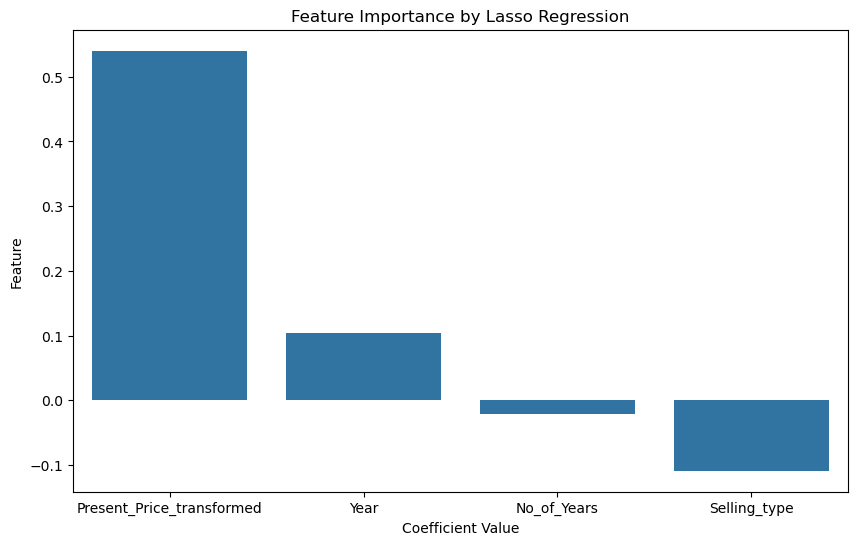

In [262]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the important features selected by Lasso
plt.figure(figsize=(10, 6))
sns.barplot(y='Coefficient', x='Feature', data=important_features.sort_values(by='Coefficient', ascending=False))

plt.title('Feature Importance by Lasso Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


  4- Linear Regression

In [263]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [264]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [265]:
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print(f'Mean Squared Error is : {mse}')
print(f'R-squared is :  {r2}')

Mean Squared Error is : 0.023709525712562646
R-squared is :  0.9564019812412028


In [266]:
linear_data=pd.DataFrame({'Actaul':y_test ,'Predicted':y_pred})
linear_data.reset_index(inplace=True,drop=True)
linear_data.head()

,Actaul,Predicted
0,2.41,2.45
1,0.93,1.54
2,0.47,0.34
3,0.22,0.18
4,1.72,1.67


# Plot True Values vs. Predicted Values

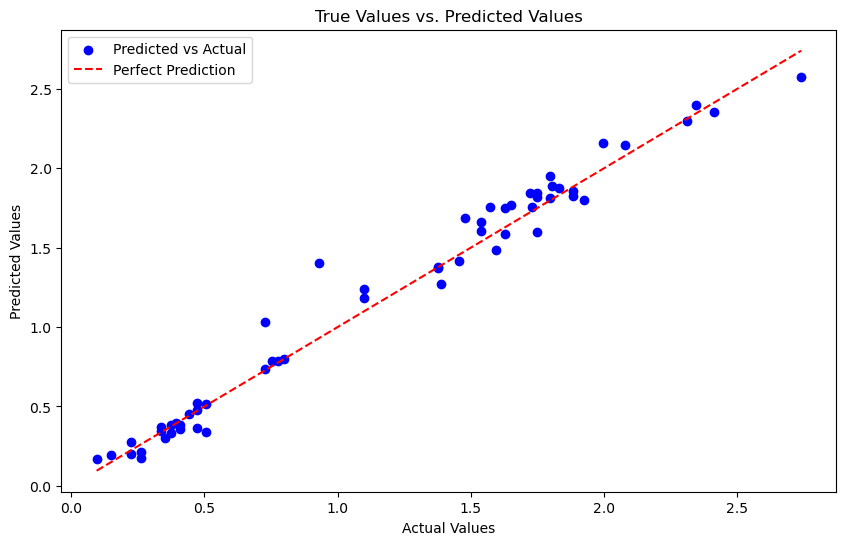

In [267]:

plt.figure(figsize=(10, 6))
plt.scatter(gradient_data['Actual'], gradient_data['Predicted'], color='blue', label='Predicted vs Actual')

# Line for perfect prediction
min_value = gradient_data['Actual'].min()
max_value = gradient_data['Actual'].max()
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs. Predicted Values')
plt.legend()

plt.show()


In [268]:
results=pd.DataFrame({
    'Model':['Gradient Boosting','Decision Tree','Lasso','LinearRegression'],
    'Score':[0.97,0.956,0.952,0.96]
})
result_pd=results.sort_values(by='Score',ascending=False)
result_pd=result_pd.set_index('Score')
result_pd

,Model
Score,
0.97,Gradient Boosting
0.96,LinearRegression
0.96,Decision Tree
0.95,Lasso
